In [1]:
from sklearn.datasets import fetch_openml

In [2]:
# mnist = fetch_openml('mnist_784', version = 1)
# mnist.keys()

In [3]:
import numpy as np
import pandas as pd

In [4]:
mnist = pd.read_csv('train.csv')

In [5]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
mnist.describe

<bound method NDFrame.describe of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

     

In [7]:
mnist.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [8]:
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

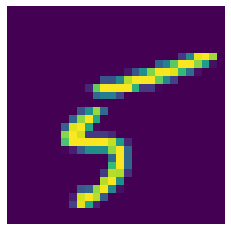

In [9]:
plt.imshow(np.array(mnist.drop('label', axis = 1).loc[22881]).reshape(28, 28))
plt.axis(False)

In [10]:
mnist['label'][22881]

5

In [11]:
X = mnist.drop('label', axis = 1)
y = mnist['label'].copy()

In [12]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
y.value_counts()/420

1    11.152381
7    10.478571
3    10.359524
9     9.971429
2     9.945238
6     9.850000
0     9.838095
4     9.695238
8     9.673810
5     9.035714
Name: label, dtype: float64

In [16]:
x_train_tmp, x_test_tmp, y_train_tmp, y_test_tmp = train_test_split(X, y, test_size = 0.4)
print(x_train_tmp.shape, x_test_tmp.shape, y_train_tmp.shape, y_test_tmp.shape)

(25200, 784) (16800, 784) (25200,) (16800,)


In [17]:
y_train_tmp.value_counts()/252

1    11.103175
7    10.456349
3    10.305556
2    10.027778
0     9.908730
9     9.857143
6     9.809524
4     9.801587
8     9.583333
5     9.146825
Name: label, dtype: float64

In [18]:
y_train_tmp = (y_train_tmp == 5)
y_test_tmp = (y_test_tmp == 5)

In [19]:
spliter = StratifiedShuffleSplit(test_size = 0.4)

for train_index, test_index in spliter.split(X, y):
    strat_train_x, strat_train_y = X.loc[train_index], y.loc[train_index]
    strat_test_x, strat_test_y = X.loc[test_index], y.loc[test_index]

In [20]:
print(strat_train_x.shape, strat_train_y.shape,
      strat_test_x.shape, strat_test_y.shape)

(25200, 784) (25200,) (16800, 784) (16800,)


In [21]:
strat_train_y.value_counts()/252

1    11.150794
7    10.480159
3    10.361111
9     9.972222
2     9.944444
6     9.849206
0     9.837302
4     9.694444
8     9.674603
5     9.035714
Name: label, dtype: float64

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
y_train_5 = (strat_train_y == 5)
y_train_5.head(10)

30613    False
31479    False
34439     True
36959    False
11968    False
17403    False
37826    False
30090     True
28453     True
26614    False
Name: label, dtype: bool

In [24]:
y_test_5 = (strat_test_y == 5)
y_test_5.head(10)

28961     True
22379    False
33710    False
24649    False
29279    False
36454    False
40605    False
11966    False
38717    False
11736    False
Name: label, dtype: bool

In [25]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(strat_train_x, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
sgd_clf.score(strat_test_x, y_test_5)

0.9631547619047619

In [27]:
sdg_clf_2 = SGDClassifier(random_state = 42)
sdg_clf_2.fit(x_train_tmp, y_train_tmp)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
sdg_clf_2.score(x_test_tmp, y_test_tmp)

0.9630952380952381

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.linear_model import SGDClassifier

In [30]:
sgd_clf = SGDClassifier(random_state = 42)

In [31]:
skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

In [32]:
y_5 = (y == 5)
y_5.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
Name: label, dtype: bool

In [33]:
for train_index, test_index in skfolds.split(strat_train_x, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X.loc[train_index]
    y_train_folds = y_5.loc[train_index]
    X_test_folds = X.loc[test_index]
    y_test_folds = y_5.loc[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

0.9635714285714285
0.9585714285714285
0.9120238095238096


In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cross_val_score(sgd_clf, strat_train_x, y_train_5, cv = 3, scoring = 'accuracy')

array([0.96630952, 0.96619048, 0.9677381 ])

In [36]:
from sklearn.base import BaseEstimator

In [37]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [38]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, strat_train_x, y_train_5, cv = 3, scoring = 'accuracy')

array([0.90535714, 0.91095238, 0.91261905])

That's right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.

This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

In [39]:
never_5_clf = Never5Classifier()

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [41]:
spliter = StratifiedKFold(n_splits = 3)

In [42]:
for train_index, test_index in spliter.split(strat_train_x, y_train_5):
    clone_clf = clone(never_5_clf)
    X_train_folds = X.loc[train_index]
    y_train_folds = y_5.loc[train_index]
    X_test_folds = X.loc[test_index]
    y_test_folds = y_5.loc[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    predicted = clone_clf.predict(X_test_folds)
    n_correct = sum(predicted.ravel() == y_test_folds)
    print(n_correct/len(predicted))

0.9096428571428572
0.9088095238095238
0.9103571428571429


In [43]:
from sklearn.linear_model import SGDClassifier

In [44]:
sgd_clf = SGDClassifier()

In [45]:
from sklearn.model_selection import cross_val_predict

In [46]:
y_train_pred = cross_val_predict(sgd_clf, strat_train_x, y_train_5, cv = 3)
y_train_pred

array([False, False,  True, ..., False, False, False])

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_train_5, y_train_pred)

array([[22216,   707],
       [  534,  1743]], dtype=int64)

In [49]:
from sklearn.metrics import precision_score, recall_score

In [50]:
precision_score(y_train_5, y_train_pred)

0.7114285714285714

In [51]:
recall_score(y_train_5, y_train_pred)

0.7654808959156785

In [52]:
from sklearn.metrics import f1_score

In [53]:
f1_score(y_train_5, y_train_pred)

0.7374656230167124

In [54]:
i = 0
while True:
    try:
        some_digit = x_test_tmp.loc[i]
        some_label = y_test_tmp.loc[i]
        break
    except:
        i += 1;

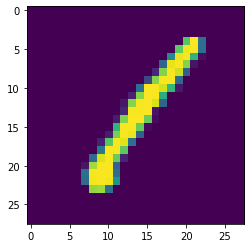

In [55]:
plt.imshow(some_digit.values.reshape(28, 28))

In [56]:
some_label

False

In [57]:
from sklearn.linear_model import SGDClassifier

In [58]:
sgd_clf = SGDClassifier()
sgd_clf.fit(strat_train_x, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
y_score = sgd_clf.decision_function([some_digit])
y_score

array([-22398.42493363])

In [60]:
i = 0
while True:
    try:
        some_digit = x_test_tmp.loc[i]
        some_label = y_test_tmp.loc[i]
        
        if some_label == True:
            break
        else:
            i += 1
    except:
        i += 1
        continue

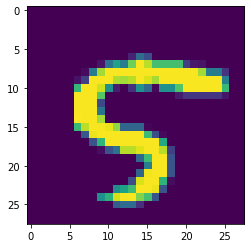

In [61]:
plt.imshow(some_digit.values.reshape(28, 28))

In [62]:
some_label

True

In [63]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([12782.04250157])

In [64]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [65]:
threshold = 10000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

This confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the thresold is 0, but it misses it when the threshold is increased to 10000.

In [66]:
from sklearn.model_selection import cross_val_predict

In [67]:
y_scores = cross_val_predict(sgd_clf, strat_train_x, y_train_5,
                            cv = 3, method = 'decision_function')

In [68]:
y_scores

array([ -79916.25704889, -147161.07534771,   82757.11969002, ...,
        -70384.4733604 ,  -85119.75022779, -155742.89480176])

In [69]:
from sklearn.metrics import precision_recall_curve

In [70]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [71]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize = (12, 7))
    plt.grid(True)
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.legend()

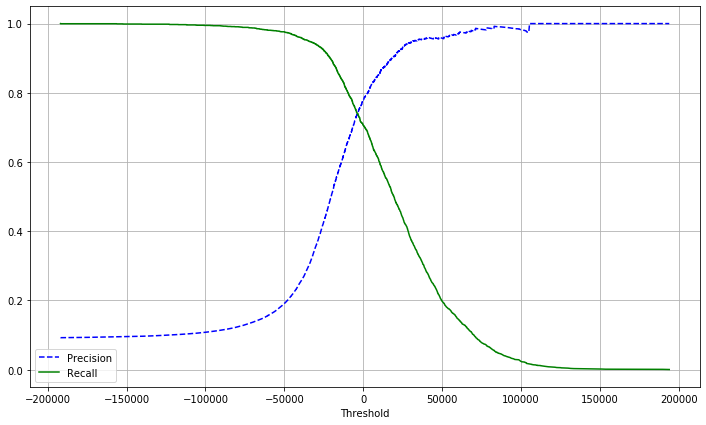

In [72]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

Text(0, 0.5, 'Precision')

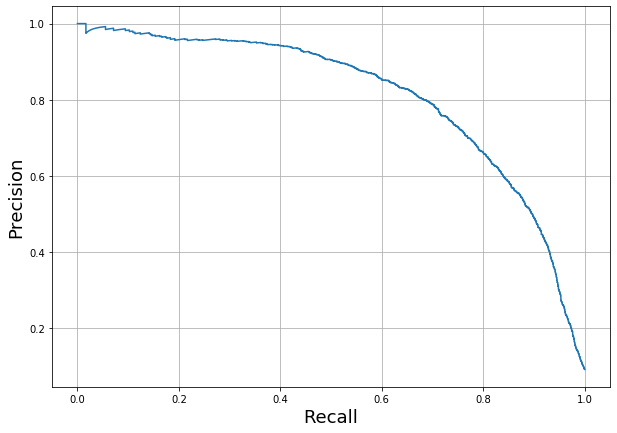

In [73]:
plt.figure(figsize = (10, 7))
plt.grid(True)
plt.plot(recalls, precisions)
plt.xlabel("Recall", fontsize = 18)
plt.ylabel("Precision", fontsize = 18)

Lest's suppose you decide to aim for 90% precision. You look up the first plot and find that you need to use a threshold of about 8000. To be more precise you can search for the lowest threshold that gives you at least 90% precision (np.argmax() will give us the first index of the maximum value, which in this case means the first True value):

In [74]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

18087.065919487177

In [75]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [76]:
precision_score(y_train_5, y_train_pred_90)

0.9003091190108191

In [77]:
recall_score(y_train_5, y_train_pred_90)

0.5116381203337725

In [78]:
from sklearn.metrics import roc_curve

In [79]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [80]:
def plot_roc_curve(fpt, tpr, label = None):
    plt.figure(figsize = (10, 7))
    plt.grid(True)
    plt.plot(fpt, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], 'k--')
    plt.xlabel("False positive rate", fontsize = 18)
    plt.ylabel("True positive rate", fontsize = 18)

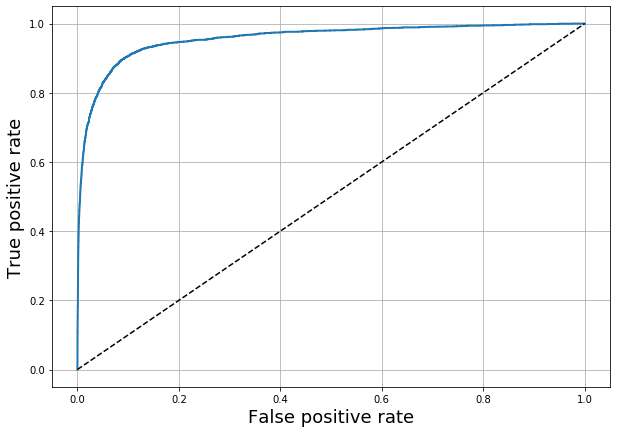

In [81]:
plot_roc_curve(fpr, tpr)

In [82]:
from sklearn.metrics import roc_auc_score

In [83]:
roc_auc_score(y_train_5, y_scores)

0.9573369216768954

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
forest_clf = RandomForestClassifier(random_state = 42)
y_proba_forest = cross_val_predict(forest_clf, strat_train_x, y_train_5, cv = 10,
                                  method = 'predict_proba')

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [86]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [87]:
y_tmp = (y_proba_forest[:, 1] >= 0.8)

In [88]:
precision_score(y_train_5, y_tmp)

0.9977341389728097

In [89]:
recall_score(y_train_5, y_tmp)

0.5801493192797541

In [90]:
from sklearn.metrics import precision_recall_curve

In [91]:
precisions_tmp, recalls_tmp, thresholds_tmp = precision_recall_curve(y_train_5, y_tmp)

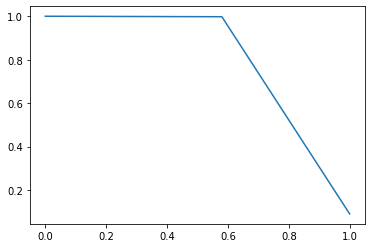

In [92]:
plt.plot(recalls_tmp, precisions_tmp)

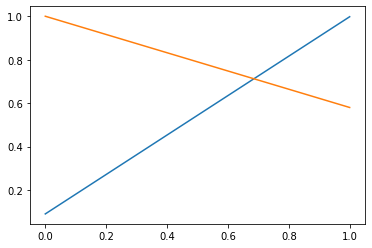

In [93]:
plt.plot(thresholds_tmp, precisions_tmp[: -1])
plt.plot(thresholds_tmp, recalls_tmp[: -1])

In [94]:
from sklearn.metrics import roc_curve

In [95]:
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_train_5, y_tmp)

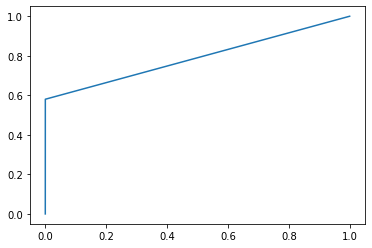

In [96]:
plt.plot(fpr_tmp, tpr_tmp)

In [97]:
from sklearn.metrics import roc_auc_score

In [98]:
roc_auc_score(y_train_5, y_tmp)

0.7900092231786809

In [99]:
y_scores_forest = y_proba_forest[:, 1]
y_scores_forest

array([0. , 0. , 0.9, ..., 0. , 0. , 0. ])

In [100]:
for i in range(len(y_scores_forest)):
    print('\r', bool(y_scores_forest[i]), y_scores_forest[i])

 False 0.0
 False 0.0
 True 0.9
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 True 0.8
 True 0.6
 True 0.1
 False 0.0
 True 0.6
 False 0.0
 True 1.0
 False 0.0
 True 0.1
 True 0.2
 False 0.0
 True 0.3
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 True 0.6
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.3
 True 0.2
 False 0.0
 True 1.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.3
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.9
 False 0.0
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 True 0.6
 False 0.0
 True 0.7
 False 0.0
 True 0.9
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0


 False 0.0
 False 0.0
 True 0.2
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.8
 True 0.4
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 1.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.1
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 True 0.7
 True 0.5
 False 0.0
 True 0.1
 True 0.2
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.8
 True 0.9
 False 0.0
 True 0.1
 True 0.8
 False 0.0
 False 0.0
 True 0.7
 False 0.0
 True 0.9
 False 0.0
 False 0.0
 True 0.1
 Fa

 True 0.1
 False 0.0
 True 0.1
 False 0.0
 True 0.1
 False 0.0
 True 0.3
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 1.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 1.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 True 0.9
 False 0.0
 True 0.1
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.6
 True 0.3
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 

 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 True 0.6
 True 0.1
 True 0.2
 False 0.0
 True 1.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.8
 False 0.0
 True 0.3
 True 0.7
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 1.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.9
 True 0.6
 False 0.0
 True 1.0
 True 0.1
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 Tru

 False 0.0
 False 0.0
 True 1.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.8
 True 0.9
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.2
 False 0.0
 True 0.9
 False 0.0
 True 0.1
 True 0.2
 True 1.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.2
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 False 0.0
 True 0.1
 False 0.0
 True 0.9
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.8
 False 0.0
 True 0.9
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.9
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.6
 False 0.0
 True 0.4
 False 0.0
 False 0.0
 False 0.0
 True 0.7
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 False 0.0
 True 0.8
 True 0.9
 True 0.7
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.3
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.3
 False 0.0


 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.3
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.6
 False 0.0
 True 0.1
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.6
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.4
 False 0.0
 False 0.0
 True 0.8
 False 0.0
 False 0.0
 False 0.0
 True 0.7
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 1.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.1
 True 0.9
 True 0.9
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 True 

 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.5
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.5
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 True 0.9
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 True 0.8
 True 1.0
 False 0.0
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.6
 True 0.4
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.7
 True 0.8
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.9
 False 0.0
 False 0.0
 False 0.0
 True 0.3
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 Fa

 False 0.0
 False 0.0
 False 0.0
 True 0.2
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.6
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.3
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 True 0.8
 True 0.5
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.8
 False 0.0
 True 0.1
 False 0.0
 True 0.6
 True 1.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 1.0
 True 0.7
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.9
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.8
 False 0.0
 True 0.6
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.

 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.8
 False 0.0
 False 0.0
 True 0.3
 True 0.8
 True 0.5
 True 0.7
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.1
 True 0.1
 True 0.3
 True 0.1
 True 1.0
 True 0.1
 False 0.0
 True 1.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.9
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.2
 False 0.0
 False 0.0
 True 1.0
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 True 0.1
 True 0.2
 False 0.0
 True 0.1
 True 0.4
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 1.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.3
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 True 0.3
 True 1.0
 True 0.2
 True 0.1
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.3
 False 0.0
 False 0.0
 Fa

 False 0.0
 True 0.3
 True 1.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.8
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.7
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.7
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 True 0.4
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 True 0.7
 True 0.1
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.9
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.5
 False 0.0
 True 0.3
 True 0.3
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0

 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.3
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.9
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.7
 True 0.1
 True 0.6
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.9
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 True 0.8
 True 0.3
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.7
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 1.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0

 False 0.0
 True 0.7
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.5
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 1.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 1.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 True 0.3
 False 0.0
 True 0.1
 True 1.0
 False 0.0
 True 0.1
 False 0.0
 True 0.8
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 True 0.1
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.3
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.3
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.2
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 Fal

 True 0.1
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.9
 False 0.0
 True 0.3
 False 0.0
 True 0.2
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.8
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.8
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 True 0.1
 True 0.9
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.7
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.8
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 True 0.6
 False 0.0
 True 0.1
 True 0.1
 True 0.2
 False 0.0
 F

 False 0.0
 False 0.0
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 True 0.2
 True 0.2
 True 0.1
 False 0.0
 True 0.4
 True 0.3
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 True 0.4
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.3
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.5
 True 0.2
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.3
 True 0.6
 False 0.0
 False 0.0
 True 0.1
 True 0.2
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.4
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.7
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 Tr

 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 1.0
 False 0.0
 True 0.2
 False 0.0
 True 0.5
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 True 0.2
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.4
 False 0.0
 True 0.9
 False 0.0
 True 0.7
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.5
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.8
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 1.

 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.1
 True 1.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.4
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.8
 False 0.0
 True 0.9
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.6
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0

 True 0.3
 True 0.9
 True 0.1
 False 0.0
 True 0.1
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 True 0.8
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.6
 True 0.4
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.9
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 True 0.3
 False 0.0
 True 0.9
 True 0.3
 False 0.0
 True 0.3
 True 0.1
 False 0.0
 True 0.5
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.4
 False 0.0
 True 0.2
 True 0.1
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.9
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 True 0.2
 True 0.3
 False 0.0
 False 0.0
 True 1.0
 True 1.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.7
 True 0.1
 False 0

 False 0.0
 True 0.8
 False 0.0
 False 0.0
 True 0.2
 True 0.1
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 True 0.2
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 True 1.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.7
 True 1.0
 True 0.2
 True 0.1
 True 1.0
 False 0.0
 True 0.1
 False 0.0
 True 0.5
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 True 0.8
 True 0.1
 False 0.0
 False 0.0
 True 0.6
 False 0.0
 True 0.3
 True 0.7
 True 0.2
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.6
 False 0.0
 True 0.2
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2


 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.8
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.4
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.7
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 True 0.9
 True 0.9
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 True 0.1
 True 0.3
 True 0.8
 True 0.1
 True 0.8
 False 0.0
 False 0.0
 False 0.0
 True 1.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 True 0.8
 True 1.0
 True 0.1
 True 0.1
 True 0.2
 False 0.0
 False 0.0
 True 0.2
 False 0.0
 True 0.2
 Tru

 False 0.0
 False 0.0
 False 0.0
 True 0.8
 False 0.0
 True 0.3
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 1.0
 True 0.4
 True 0.2
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.8
 False 0.0
 False 0.0
 True 0.8
 True 0.1
 False 0.0
 True 0.8
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.3
 False 0.0
 True 0.3
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.3
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.2
 True 1.0
 False 0.0
 False 0.0
 True 0.3
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.1
 True 0.1
 False 0.0
 True 0.2
 False 0.0
 True 0.1
 False 0.0
 True 0.2
 False 0.0
 True 0.1
 False 0.0
 True 0.1
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 False 0.0
 True 0.4
 False 0.0
 True 0.7
 Tr

In [101]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

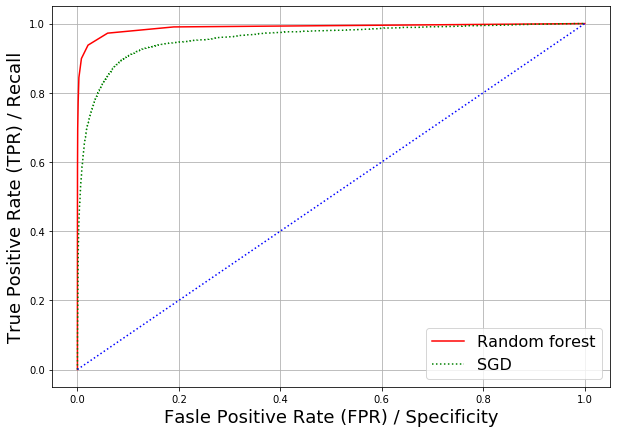

In [102]:
plt.figure(figsize = (10, 7))
plt.plot(fpr_forest, tpr_forest, 'r', label = 'Random forest')
plt.plot(fpr, tpr, 'g:', label = 'SGD')
plt.plot([0, 1], [0, 1], 'b:')
plt.grid(True)
plt.xlabel('Fasle Positive Rate (FPR) / Specificity', fontsize = 18)
plt.ylabel('True Positive Rate (TPR) / Recall', fontsize = 18)
plt.legend(loc = 4, prop = {'size': 16})

In [103]:
from sklearn.metrics import roc_auc_score

In [104]:
roc_auc_score(y_train_5, y_scores_forest)

0.9894876722630885

In [105]:
from sklearn.metrics import precision_score, recall_score

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [107]:
forest_clf = RandomForestClassifier(random_state = 42)

In [108]:
forest_clf_score = cross_val_predict(forest_clf, strat_train_x, y_train_5, cv = 3)

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [109]:
forest_clf_score

array([False, False,  True, ..., False, False, False])

In [110]:
precision_score(y_train_5, forest_clf_score)

0.9826388888888888

In [111]:
recall_score(y_train_5, forest_clf_score)

0.7457180500658761

## Multiclass Classification

In [112]:
from sklearn.linear_model import SGDClassifier

In [113]:
sgd_clf = SGDClassifier()
sgd_clf.fit(strat_train_x, strat_train_y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [116]:
i = 0

while True:
    try:
        tmp_x = strat_test_x.loc[i]
        tmp_y = strat_test_y.loc[i]
        break
    except:
        i += 1

In [119]:
sgd_clf.predict([tmp_x])

array([1], dtype=int64)

In [120]:
tmp_y

1

In [131]:
m = sgd_clf.decision_function([tmp_x])

for i in enumerate(m.ravel()):
    print(i)

(0, -78728.41107523147)
(1, 38465.886299505524)
(2, -5149.2779426343395)
(3, -12517.361475733036)
(4, -51362.898965625674)
(5, -15746.329448344957)
(6, -49707.731526371404)
(7, -84661.71325358424)
(8, -1124.7739464968918)
(9, -24144.78336667173)


In [132]:
np.argmax(m)

1

In [133]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [135]:
sgd_clf.classes_[np.argmax(m)]

1

In [136]:
from sklearn.multiclass import OneVsOneClassifier

In [137]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))

In [138]:
ovo_clf.fit(strat_train_x, strat_train_y)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [139]:
ovo_clf.predict([tmp_x])

array([1], dtype=int64)

In [140]:
tmp_y

1

In [141]:
len(ovo_clf.estimators_)

45

In [143]:
ovo_bin = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_bin.fit(strat_train_x, y_train_5)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [145]:
len(ovo_bin.estimators_)

1

For Random Forest Classifier we don't have to run OvA or OvO because Random Forest Classifier can directly classify instances into multiple classes.

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
forest_clf = RandomForestClassifier(random_state = 43)
forest_clf.fit(strat_train_x, strat_train_y)

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=43, verbose=0,
                       warm_start=False)

In [148]:
forest_clf.predict([tmp_x])

array([1], dtype=int64)

In [149]:
tmp_y

1

In [150]:
forest_clf.predict_proba([tmp_x])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [152]:
cross_val_score(sgd_clf, strat_train_x, strat_train_y, cv = 3, scoring = 'accuracy')

array([0.87507436, 0.85962615, 0.87553597])

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
scaler = StandardScaler()

In [158]:
scale_train_x = scaler.fit_transform(strat_train_x.astype(np.float64))
scale_train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

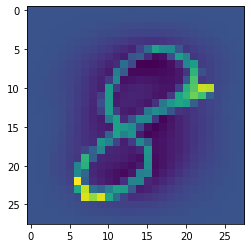

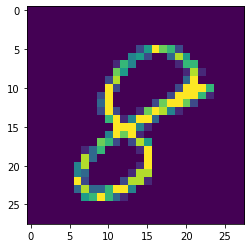

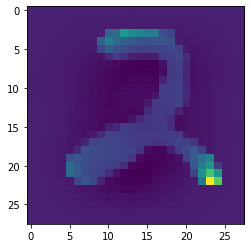

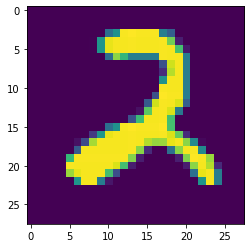

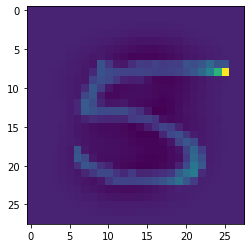

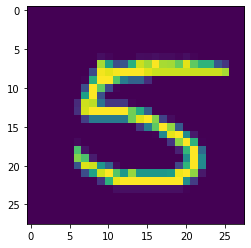

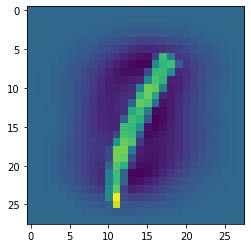

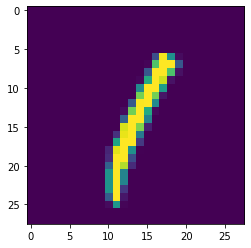

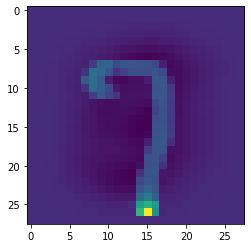

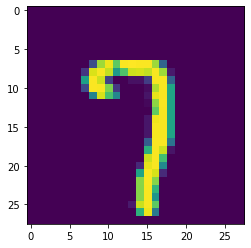

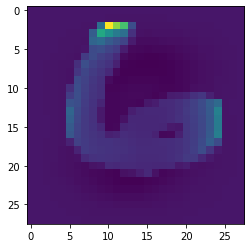

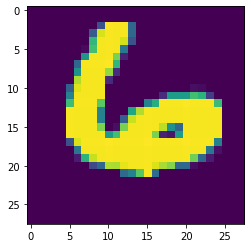

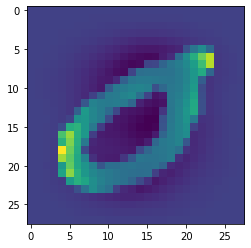

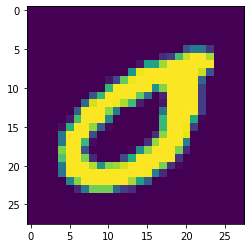

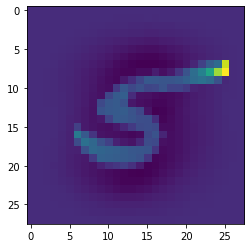

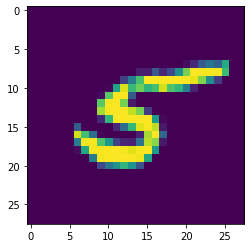

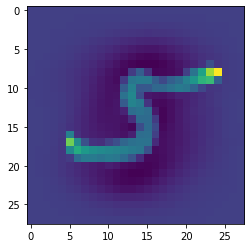

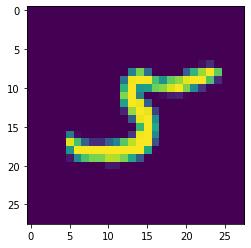

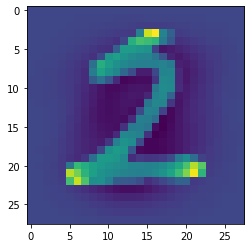

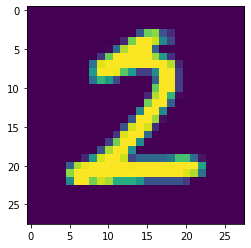

In [185]:
for i in range(10):
    plt.imshow(scale_train_x[i].reshape(28, 28))
    plt.show()
    plt.imshow(strat_train_x.values[i].reshape(28, 28))
    plt.show()

In [186]:
cross_val_score(sgd_clf, scale_train_x, strat_train_y, cv = 3, scoring = 'accuracy')

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.90672219, 0.9080843 , 0.90352549])

In [187]:
y_train_pred = cross_val_predict(sgd_clf, scale_train_x, strat_train_y, cv = 3)

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [188]:
from sklearn.metrics import confusion_matrix

In [189]:
conf_matrix = confusion_matrix(strat_train_y, y_train_pred)
conf_matrix

array([[2362,    0,    8,    6,    4,   34,   18,    1,   44,    2],
       [   0, 2689,   19,   16,    0,   21,    6,    4,   51,    4],
       [   8,   11, 2216,   50,   34,   13,   37,   27,  104,    6],
       [  11,   16,   55, 2256,    1,  105,   19,   17,   99,   32],
       [   7,    6,   15,    7, 2224,   10,   18,   12,   65,   79],
       [  17,   14,   13,   88,   34, 1915,   31,   10,  115,   40],
       [   8,    9,   18,    0,   22,   50, 2341,    2,   32,    0],
       [   7,    9,   34,   16,   18,    7,    3, 2416,   18,  113],
       [   7,   36,   16,   57,    3,   68,   11,    6, 2205,   29],
       [  13,   10,    9,   28,   73,   19,    1,   80,   84, 2196]],
      dtype=int64)

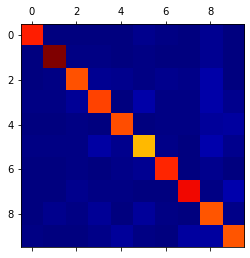

In [190]:
plt.matshow(conf_matrix, cmap = plt.get_cmap('jet'))

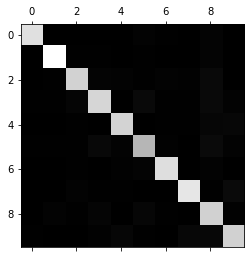

In [197]:
plt.matshow(conf_matrix, cmap = plt.cm.gray)